# Prediction using Unsupervised ML
---
### Author: **Kartik Randeria**
### Date: 15<sup>th</sup> September 2021
---
## Q1] From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.


In [113]:
# importing required libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Reading Data

In [114]:
# Reading csv data 
sample = pd.read_csv("Iris.csv")
sample.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [115]:
# Analysing the data
sample.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [116]:
# Drop the Id column because it is not needed
sample = sample.drop(['Id'], axis="columns")
sample.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [117]:
x = sample.iloc[:, [0, 1, 2, 3]].values
x[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

# Finding the optimum number of clusters for k-means clustering


In [118]:
wcss = []   # Within cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=100)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Using Elbow method to find the optimal number of clusters


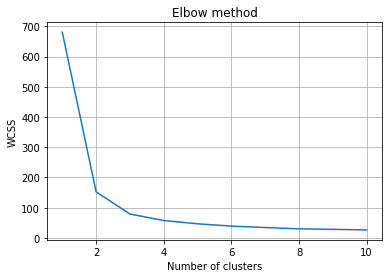

In [119]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.grid()
plt.show()

In the above elbow method we can see that the elbow is formed at 3.
### Therefore, the Optimum no. of clusters: 3

# Creating K-Means Classifier


In [120]:
kmeans = KMeans(n_clusters=3, random_state=100)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

# Visualizing the clusters


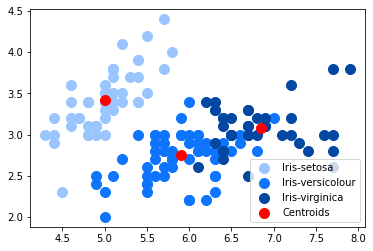

In [121]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='#9AC5FE', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='#0D75FD', label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='#0247A2', label='Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

In [125]:
# Let's Consider 0 for 'Iris-setosa', 1 for 'Iris-versicolour', 3 for 'Iris-virginica'
y_kmeans = np.where(y_kmeans == '0', 'Iris-setosa', y_kmeans)
y_kmeans = np.where(y_kmeans == '1', 'Iris-versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans == '2', 'Iris-virginica', y_kmeans)
data_with_clusters = sample.copy()
data_with_clusters["Predicted Species"] = y_kmeans
data_with_clusters.head(5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted Species
0,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa


# Visualizing the Predicted data

<AxesSubplot:ylabel='Predicted Species'>

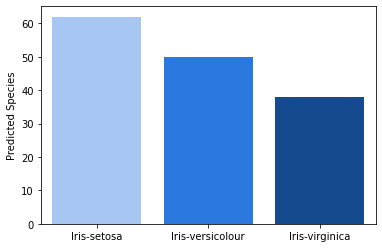

In [126]:
# Bar graph plot
sns.barplot(x=data_with_clusters["Predicted Species"] .unique(),
            y=data_with_clusters["Predicted Species"] .value_counts(),
            palette=sns.color_palette(["#9AC5FE", "#0D75FD", "#0247A2"]))


### Here we have predicted that there are ariund 62 species of Iris-setosa, 50 of Iris-versicolour and 38 species of Iris-virginica